In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1.Data Preperation

In [2]:
df = pd.read_csv('E:\machine learning\HomeWork2\Projects\HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# 2.EDA

In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

crim
[0.00632 0.02731 0.02729 0.03237 0.06905]
484

zn
[18.   0.  12.5 75.  21. ]
26

indus
[2.31 7.07 2.18 7.87 8.14]
76

chas
[ 0. nan  1.]
2

nox
[0.538 0.469 0.458 0.524 0.499]
81

rm
[6.575 6.421 7.185 6.998 7.147]
446

age
[65.2 78.9 61.1 45.8 54.2]
348

dis
[4.09   4.9671 6.0622 5.5605 5.9505]
412

rad
[1 2 3 5 4]
9

tax
[296 242 222 311 307]
66

ptratio
[15.3 17.8 18.7 15.2 21. ]
46

b
[396.9  392.83 394.63 394.12 395.6 ]
357

lstat
[4.98 9.14 4.03 2.94  nan]
438

medv
[24.  21.6 34.7 33.4 36.2]
229



# Info about our Dataset

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000’s

In [6]:
df.isnull().sum()

crim       20
zn         20
indus      20
chas       20
nox         0
rm          0
age        20
dis         0
rad         0
tax         0
ptratio     0
b           0
lstat      20
medv        0
dtype: int64

# 3.Setting-up The Validation Framework


In [7]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [8]:
idx = np.arange(n)
np.random.seed(10)
np.random.shuffle(idx)

In [9]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

<AxesSubplot:xlabel='medv', ylabel='Count'>

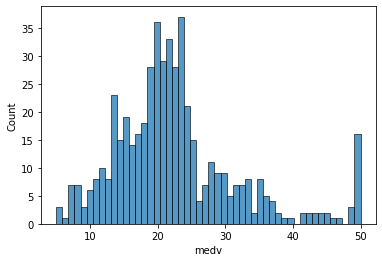

In [10]:
sns.histplot(df.medv, bins=50)

In [11]:
y_train =df_train.medv
y_val = df_val.medv
y_test = df_test.medv

In [12]:
del df_train['medv']
del df_val['medv']
del df_test['medv']

In [13]:
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
305,0.05479,33.0,NaN,0.0,0.472,6.616,58.1,3.3700,7,222,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,NaN,6.2196,1,265,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,NaN
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5,403,14.7,341.60,13.28


# 4.Training a Linear Regression Model

In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [15]:
base = ['crim', 'zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
w0,w

(31.99139356908585,
 array([-1.10914392e-01,  3.75436224e-02, -3.47995580e-02,  3.49044120e+00,
        -1.38515605e+01,  4.50453538e+00, -2.44351763e-02, -1.39842854e+00,
         2.93232858e-01, -1.21144669e-02, -1.01990744e+00,  8.44404892e-03,
        -4.09188871e-01]))

### RMSE function

In [16]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [17]:
rmse(y_train, y_pred)

4.999971909116123

<AxesSubplot:xlabel='medv', ylabel='Count'>

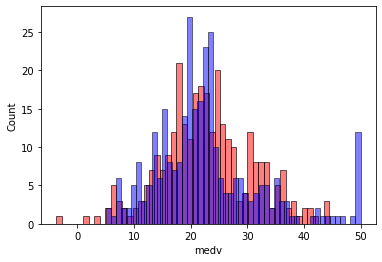

In [18]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# 5.Validating The Model

In [19]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [20]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

4.0451724014137875

In [21]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

4.982600270717446

<AxesSubplot:xlabel='medv', ylabel='Count'>

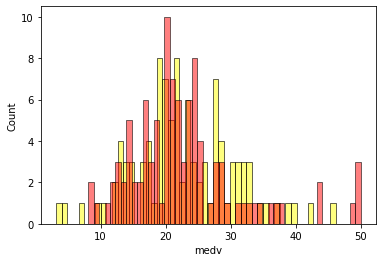

In [22]:
sns.histplot(y_pred, color='yellow', alpha=0.5, bins=50)
sns.histplot(y_test, color='red', alpha=0.5, bins=50)

# 6.Full Train (80%,20%)

In [23]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

In [24]:
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression(X_full_train, y_full_train)

In [25]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

4.99848903680726

# 7.Categorical Variables Into Consideration & Regularization 


In [26]:
def prepare_new_X(df):
    
    df = df.copy()
    features= base.copy()
    
    for v in ['river','no river']:
        df['chas_%s' % v] = (df.chas == v).astype(int)
        features.append('chas_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [27]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [28]:
X_train_new = prepare_new_X(df_full_train)
w0, w = train_linear_regression_reg(X_train_new, y_full_train, r=0.001)

X_test_new = prepare_new_X(df_test)
y_pred = w0 + X_test_new.dot(w)
rmse(y_test, y_pred)

4.998821505924779

<AxesSubplot:xlabel='medv', ylabel='Count'>

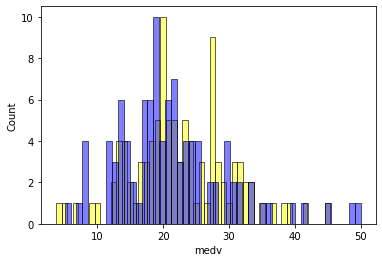

In [29]:
sns.histplot(y_pred, color='yellow', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# 7.1 Different (r)s

In [30]:
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    X_train_new = prepare_new_X(df_full_train)
    w0, w = train_linear_regression_reg(X_train_new, y_full_train, r=r)
    
    X_test_new = prepare_new_X(df_test)
    y_pred = w0 + X_test_new.dot(w)
    score = round(rmse(y_test, y_pred),2)
    print(' r = {}, w0 = {}, RMSE value = {}'.format(r,w0,score))

 r = 1e-06, w0 = 29.97553658761599, RMSE value = 5.0
 r = 0.0001, w0 = 29.970468003892833, RMSE value = 5.0
 r = 0.001, w0 = 29.92447111175957, RMSE value = 5.0
 r = 0.01, w0 = 29.472403183688556, RMSE value = 5.0
 r = 0.1, w0 = 25.62296492228274, RMSE value = 5.03
 r = 1, w0 = 11.400979132703497, RMSE value = 5.18
 r = 5, w0 = 3.64872729280504, RMSE value = 5.26
 r = 10, w0 = 2.1557063751545806, RMSE value = 5.27


### Evaluating Using MAE

In [31]:
from sklearn.metrics import mean_absolute_error
print('Mean Squared Error is ',mean_absolute_error(y_pred,y_test))

Mean Squared Error is  3.3691187272495027
